In [284]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [285]:
df = pd.read_csv("Social_Network_Ads.csv")
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [286]:
df.isna().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [287]:
#Preprocessing
#The next step is to split our dataset into its attributes and labels.
X = df.iloc[:,[2,3]].values
y = df.iloc[:, 4].values

In [288]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

In [289]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [290]:
#Training and Predictions
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [291]:
# Predicting the test set results
y_pred = classifier.predict(X_test)
#y_pred

In [292]:
#Evaluating the Algorithm
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score',accuracy_score(y_test, y_pred))

[[55  3]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        58
           1       0.88      0.95      0.91        22

    accuracy                           0.95        80
   macro avg       0.93      0.95      0.94        80
weighted avg       0.95      0.95      0.95        80

accuracy_score 0.95


In [293]:
accuracy_list =[]
for i in range(1,40, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
#Train the model using the training sets
    knn.fit(X_train, y_train)
#Predict the response for test dataset
    y_pred = knn.predict(X_test)
    print('Accuracy:',accuracy_score(y_test, y_pred), "for",i)
   # accuracy_list.append(accuracy_score(y_test, y_pred))

Accuracy: 0.8625 for 1
Accuracy: 0.95 for 3
Accuracy: 0.95 for 5
Accuracy: 0.95 for 7
Accuracy: 0.95 for 9
Accuracy: 0.95 for 11
Accuracy: 0.95 for 13
Accuracy: 0.95 for 15
Accuracy: 0.95 for 17
Accuracy: 0.95 for 19
Accuracy: 0.95 for 21
Accuracy: 0.95 for 23
Accuracy: 0.95 for 25
Accuracy: 0.95 for 27
Accuracy: 0.95 for 29
Accuracy: 0.95 for 31
Accuracy: 0.95 for 33
Accuracy: 0.95 for 35
Accuracy: 0.95 for 37
Accuracy: 0.95 for 39


In [294]:
#Comparing Error Rate with the K Value
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

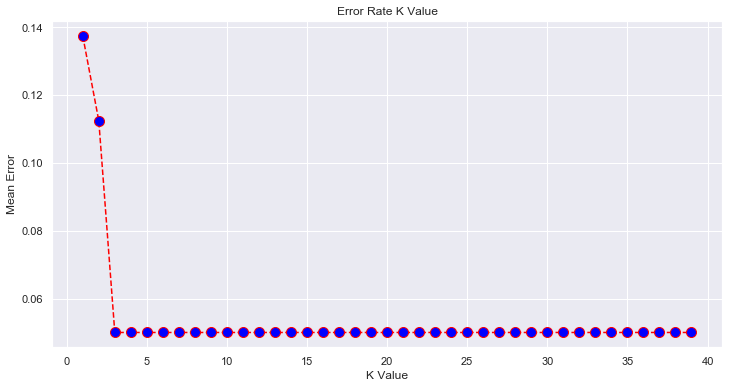

In [295]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')